C:\Users\Acer\AppData\Local\Temp\ipykernel_14488\2026925544.py:7: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Acer/Downloads/archive/flights.csv')


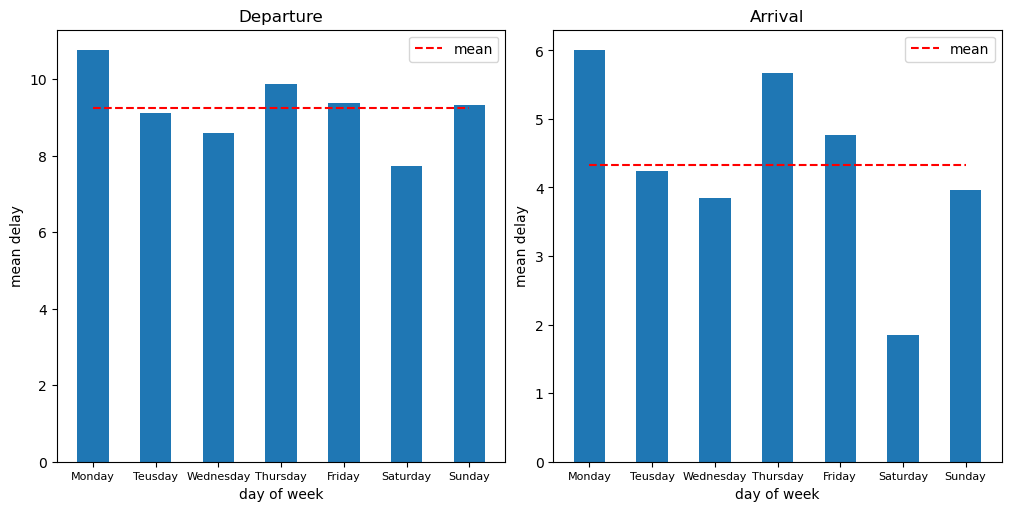

The ratio between the departute delay mean on Monday and the total departure gelay mean: 1.1654539412961007
The part of Monday Thursday and Friday arrival delays: 0.5417273944435164


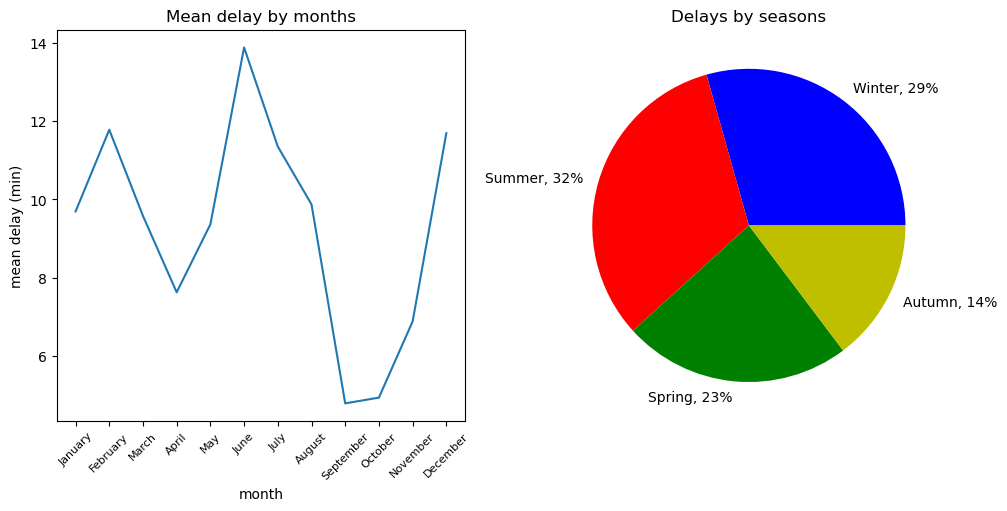

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000000000000002].


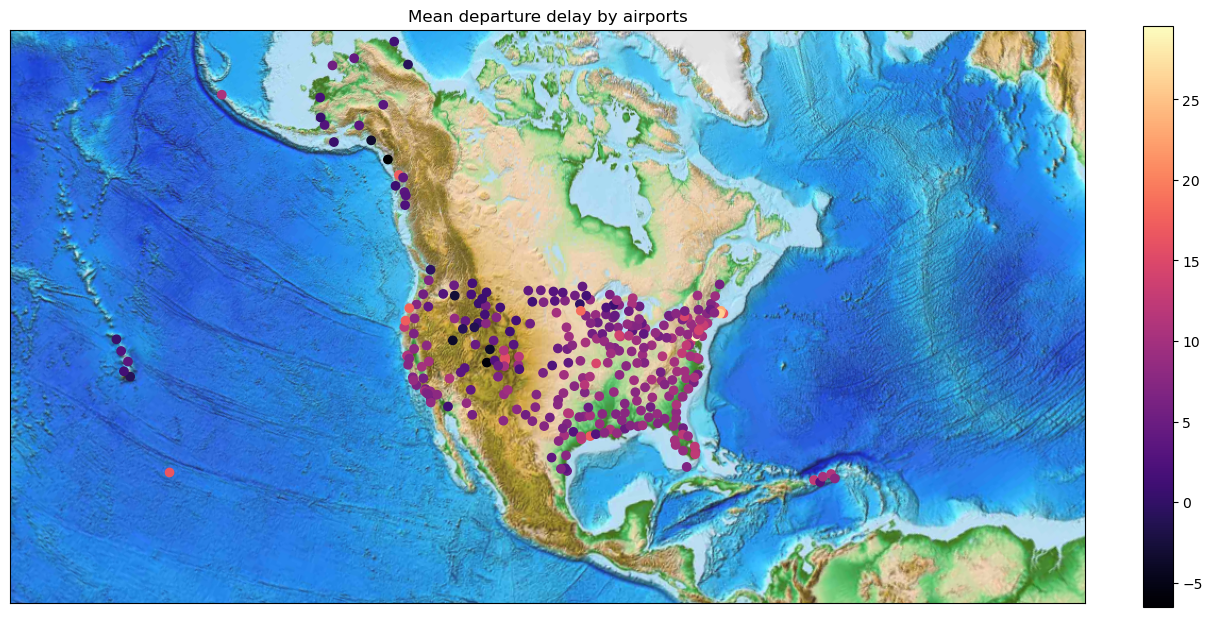

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000000000000002].


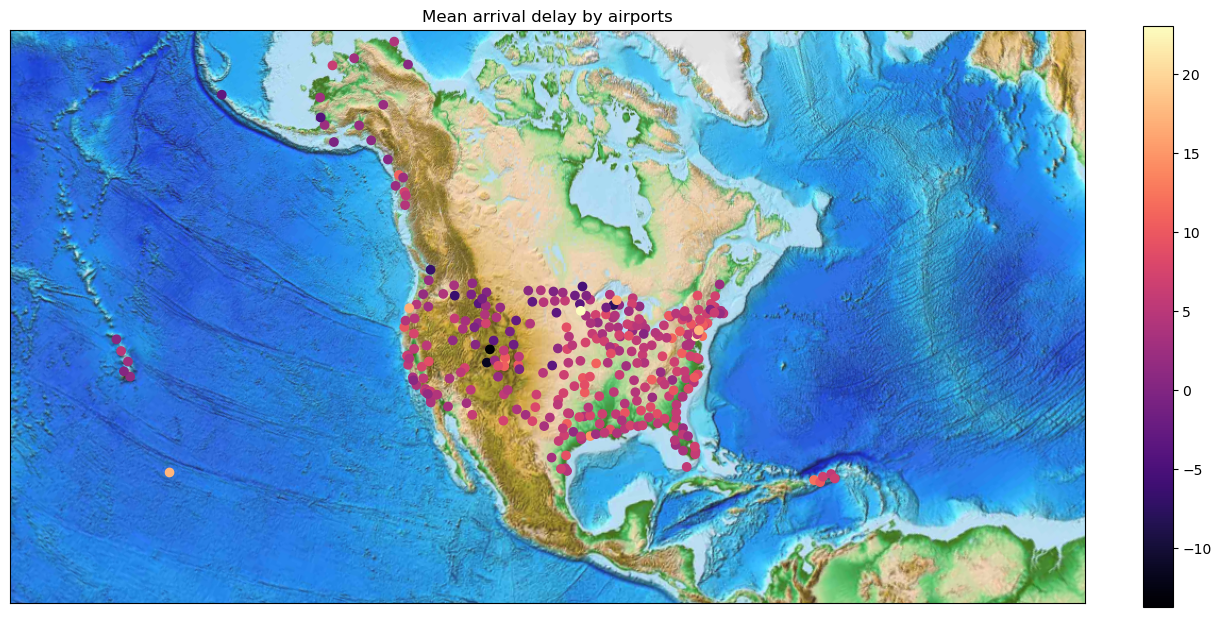

The table of airlines
   IATA_CODE                       AIRLINE  FLIGHTS      DELAY     RATIO
0         UA         United Air Lines Inc.   507762  2214313.0  4.360927
1         AA        American Airlines Inc.   712935  2753994.0  3.862896
2         US               US Airways Inc.   194223   636322.0  3.276244
3         F9        Frontier Airlines Inc.    90090   346950.0  3.851149
4         B6               JetBlue Airways   262042  1074056.0  4.098793
5         OO         Skywest Airlines Inc.   576814  2043703.0  3.543088
6         AS          Alaska Airlines Inc.   171439   347425.0  2.026523
7         NK              Spirit Air Lines   115193   471115.0  4.089788
8         WN        Southwest Airlines Co.  1242403  3831371.0  3.083839
9         DL          Delta Air Lines Inc.   870275  2707569.0  3.111165
10        EV   Atlantic Southeast Airlines   554752  2363973.0  4.261315
11        HA        Hawaiian Airlines Inc.    76041   196422.0  2.583106
12        MQ  American Eagle 

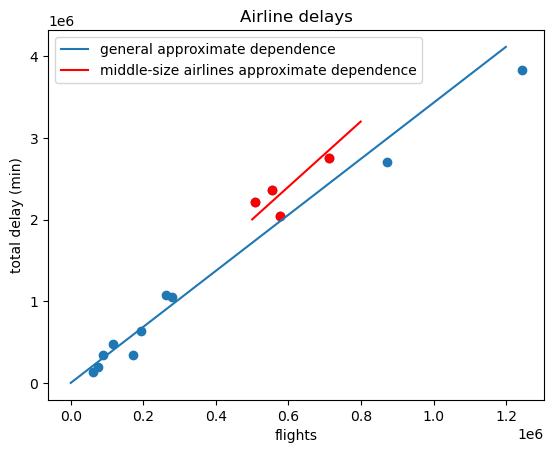

Average ratio of the total delay to the number of flights: 3.433375735053512
Average ratio of the total delay to the number of flights for middle-size airlines: 4.00705667147784


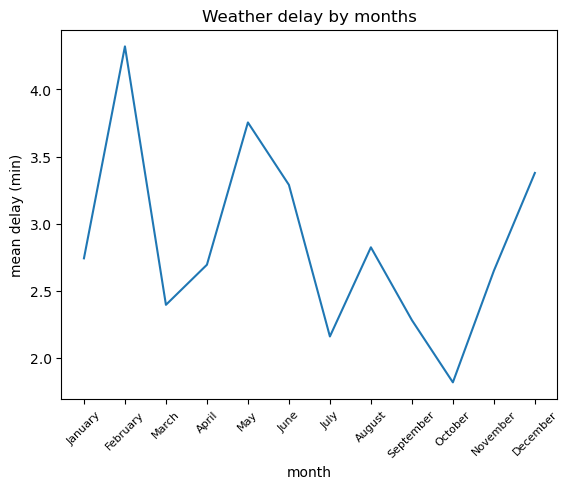

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap

df = pd.read_csv('C:/Users/Acer/Downloads/archive/flights.csv')

#Days of week
days = np.array([1, 2, 3, 4, 5, 6, 7])
ds = ['Monday', 'Teusday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df1 = df.loc[~df[['DEPARTURE_DELAY']].isna().any(axis = 1)]
df1 = df1.loc[~df[['ARRIVAL_DELAY']].isna().any(axis = 1)]

days_dep_dls = np.array([df1.DEPARTURE_DELAY.loc[df.DAY_OF_WEEK == i].mean() for i in days])
days_arr_dls = np.array([df1.ARRIVAL_DELAY.loc[df.DAY_OF_WEEK == i].mean() for i in days])

fg = plt.figure(figsize = (10, 5), constrained_layout = True)
gs = gridspec.GridSpec(ncols = 2, nrows = 1, figure = fg)

fig_ax_1 = fg.add_subplot(gs[0, 0])
plt.title('Departure')
plt.bar(ds, days_dep_dls, 0.5)
plt.plot(ds, [days_dep_dls.mean() for d in ds], '--', c = 'r', label = 'mean')
plt.ylabel('mean delay')
plt.xlabel('day of week')
plt.xticks(ds, fontsize = 8)
plt.legend()

fig_ax_2 = fg.add_subplot(gs[0, 1])
plt.title('Arrival')
plt.bar(ds, days_arr_dls, 0.5)
plt.plot(ds, [days_arr_dls.mean() for d in ds], '--', c = 'r', label = 'mean')
plt.ylabel('mean delay')
plt.xlabel('day of week')
plt.xticks(ds, fontsize = 8)
plt.legend()

plt.show()

print('The ratio between the departute delay mean on Monday and the total departure gelay mean: ' + str(ddds[0] / ddds.mean()))
print('The part of Monday Thursday and Friday arrival delays: ' + str(dads[[0, 3, 4]].sum() / dads.sum()))

#Months
months = df.MONTH.unique()
ms = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

mns_dls = np.array([df1.DEPARTURE_DELAY.loc[df.MONTH == i].mean() for i in months])

fg = plt.figure(figsize = (10, 5), constrained_layout = True)
gs = gridspec.GridSpec(ncols = 2, nrows = 1, figure = fg)

fig_ax_1 = fg.add_subplot(gs[0, 0])
plt.title('Mean delay by months')
plt.plot(ms, mns_dls)
plt.ylabel('mean delay (min)')
plt.xlabel('month')
plt.xticks(ms, fontsize = 8, rotation = 45)

fig_ax_2 = fg.add_subplot(gs[0, 1])
plt.title('Delays by seasons')

Wn = int((mdds[[0, 1, 11]].sum() / mdds.sum()) * 100)
Sp = int((mdds[[2, 3, 4]].sum() / mdds.sum()) * 100)
Sm = int((mdds[[5, 6, 6]].sum() / mdds.sum()) * 100)
At = int((mdds[[8, 9, 10]].sum() / mdds.sum()) * 100)

plt.pie([mdds[[0, 1, 11]].sum(), mdds[[5, 6, 6]].sum(), mdds[[2, 3, 4]].sum(), mdds[[8, 9, 10]].sum()],
        labels = ['Winter, ' + str(Wn) + '%', 'Summer, ' + str(Sm) + '%', 'Spring, ' + str(Sp) + '%',  'Autumn, ' + str(At) + '%'],
        colors =['b', 'r', 'g', 'y'])

plt.show()

#Airports
df2 = df1.loc[df[['ORIGIN_AIRPORT']].isin(dfa.IATA_CODE.unique()).any(axis = 1)]

dfa = pd.read_csv('C:/Users/Acer/Downloads/archive/airports.csv')
dfa['DEPARTURE_DELAY'] = np.array([df2.DEPARTURE_DELAY.loc[df2.ORIGIN_AIRPORT == a].mean() for a in dfa.IATA_CODE])
dfa['ARRIVAL_DELAY'] = np.array([df2.ARRIVAL_DELAY.loc[df2.DESTINATION_AIRPORT == a].mean() for a in dfa.IATA_CODE])

fig = plt.figure(figsize = (15, 10))
m = Basemap(projection = 'lcc', resolution = None, width = 15E6, height = 8E6, lat_0 = 45, lon_0 = -100,)
m.etopo(scale = 0.5, alpha = 0.9)

arp_xy = np.array(m(dfa['LONGITUDE'], dfa['LATITUDE'])).T

x = [a[0] for a in arp_xy]
y = [a[1] for a in arp_xy]
cr = dfa.DEPARTURE_DELAY

plt.scatter(x, y, c = cr, cmap = 'magma')
plt.colorbar(fraction = 0.025)
plt.title('Mean departure delay by airports')
plt.show()

fig = plt.figure(figsize=(15, 10))
m = Basemap(projection = 'lcc', resolution = None, width = 15E6, height = 8E6, lat_0 = 45, lon_0 = -100,)
m.etopo(scale = 0.5, alpha = 0.9)

x = [a[0] for a in arp_xy]
y = [a[1] for a in arp_xy]
cr = dfa.ARRIVAL_DELAY

plt.scatter(x, y, c = cr, cmap = 'magma')
plt.colorbar(fraction = 0.025)
plt.title('Mean arrival delay by airports')
plt.show()

#Airlines
df3 = df1.loc[~df1[['AIRLINE_DELAY']].isna().any(axis = 1)]

dfl = pd.read_csv('C:/Users/Acer/Downloads/archive/airlines.csv')
dfl['FLIGHTS'] = [len(df1.DEPARTURE_DELAY.loc[df1.AIRLINE == a]) for a in dfl.IATA_CODE]
dfl['DELAY'] = [df3.AIRLINE_DELAY.loc[df3.AIRLINE == a].sum() for a in dfl.IATA_CODE]
dfl['RATIO'] = (dfl.DELAY / dfl.FLIGHTS)

print('The table of airlines')
print(dfl)

k1 = dfl.RATIO.mean()
x = 1000 * np.arange(1200)
y = k1 * x

plt.scatter(dfl['FLIGHTS'], dfl['DELAY'])
plt.title('Airline delays')
plt.plot(x, y, label = 'general approximate dependence')
plt.xlabel('flights')
plt.ylabel('total delay (min)')

mid_arl = dfl.loc[(dfl.FLIGHTS > 500000) & (dfl.FLIGHTS < 800000)]

k2 = mid_arl.RATIO.mean()
x = 1000 * np.arange(500, 800)
y = k2 * x

plt.scatter(mid_arl['FLIGHTS'], mid_arl['DELAY'], c = 'r')
plt.plot(x, y, label = 'middle-size airlines approximate dependence', c = 'r')

plt.legend()
plt.show()

print('Average ratio of the total delay to the number of flights: ' + str(k1))
print('Average ratio of the total delay to the number of flights for middle-size airlines: ' + str(k2))

#Weather
df4 = df1.loc[~df1[['WEATHER_DELAY']].isna().any(axis = 1)]

plt.title('Weather delay by months')
plt.plot(ms, [df4.WEATHER_DELAY.loc[df4.MONTH == m].mean() for m in months])
plt.ylabel('mean delay (min)')
plt.xlabel('month')
plt.xticks(ms, fontsize = 8, rotation = 45)
plt.show()

1. Нагрузка кажду неделю

Операционная система аэропортов демонстрирует системную перегрузку в начале и конце рабочей недели. Задержки вылетов в понедельники стабильно превышают недельный средний показатель на 16%. При этом три дня-понедельник, четверг и пятница—суммарно аккумулируют свыше 50% всех задержек прибытия, что указывает на несоответствие планирования мощности инфраструктуры реальным пассажиропотокам.

2. Сезонная несбалансированность

Наиболее проблемным месяцем является июль, на который приходится пик задержек. Совместно зимний (декабрь-февраль) и летний (июнь-август) периоды ответственны за 61% общей длительности задержек за год. Это свидетельствует о недостаточной адаптации логистических процессов к выраженной сезонности спроса, характерной для периодов праздников и отпусков.

3. География и влияние

Статистика по аэропортам выявляет четкую географическую закономерность: воздушные гавани на побережье (как восточном, так и западном) систематически демонстрируют более высокие средние задержки по сравнению с аэропортами центральных штатов. Данная диспропорция коррелирует с уровнем экономической активности регионов, что позволяет предположить наличие структурного дефицита пропускной способности в наиболее востребованных транспортных узлах.

4. Управление компаний

Анализ показателей авиакомпаний выявляет почти линейную зависимость между объемом перевозок и суммарной длительностью задержек. Однако авиаперевозчики среднего сегмента (500–800 тысяч рейсов ежегодно) демонстрируют аномально высокий коэффициент задержек на рейс. Это может указывать на «ловушку среднего размера», когда компании уже не могут использовать преимущества малых гибких операций, но еще не достигли эффекта масштаба, характерного для лидеров рынка.

5. Фактор климата

Метеорологические условия оказывают существенное и предсказуемое влияние на регулярность полетов. Зимний период генерирует до 70% всех погодных задержек, с дополнительными пиками в мае (весенние осадки) и августе (грозовая активность). Февральский всплеск общих задержек почти полностью объясняется погодным фактором. Текущие системы планирования явно недооценивают климатические риски, особенно в межсезонные периоды.